По датасету из вложения построить наилучший бинарный классификатор, целевой столбец – mark. Оформить в виде jupyter notebook либо .py скрипта (тогда вывод должен быть описан в отдельном файле txt/excel/etc.).

По стеку ограничений нет. Срок 1 день.

In [192]:
import torch
import numpy as np
import pandas as pd
import catboost
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, recall_score, f1_score, accuracy_score, precision_score
import matplotlib.pyplot as plt
import catboost.datasets as cbd


In [193]:
#dfs = pd.read_excel('result_set.xlsx', sheet_name=None)

In [194]:

file_name = 'result_set.xlsx' 
df = pd.read_excel(file_name)
print(df.head())

       Ft 0      Ft 1      Ft 2      Ft 3       Ft 4      Ft 5       Ft 6  \
0  1.620967  1.056248  0.114203  6.175593   5.625789  0.581535   7.360085   
1  1.274494  0.814288  0.727210  3.606359   1.493780  7.810750  20.314335   
2  0.569931  1.607170  0.479581  3.521474   1.663726  2.297903  12.839282   
3  0.547560  1.724393  0.682358  1.809472  10.149721  2.999319  49.108530   
4  1.798884  1.748245  1.045646  1.560427   1.269053  1.403952   5.270951   

   Ft 7    Ft 8      Ft 9  Ft 10  Ft 11  Ft 12  Ft 13  Ft14        Ft15  \
0    68    male  very_low  535.0   True      5      5     0         NaN   
1    24  female      high  846.0  False      3      1     1  quite rich   
2    67    male      high  782.0  False      0      0     0    moderate   
3    42    male    medium  132.0  False      3      3     0  quite rich   
4    84    male  very_low  708.0  False      0      0     0         NaN   

                  Ft16  Ft17  mark  
0                  car     0     0  
1           

In [195]:
print(df.shape)

(5000, 19)


In [196]:
df = df.replace('?', np.nan)

df = df.dropna()
print(df.shape)
df.head()


(4089, 19)


,Ft 0,Ft 1,Ft 2,Ft 3,Ft 4,Ft 5,Ft 6,Ft 7,Ft 8,Ft 9,Ft 10,Ft 11,Ft 12,Ft 13,Ft14,Ft15,Ft16,Ft17,mark
1,1.274494,0.814288,0.727210,3.606359,1.493780,7.810750,20.314335,24,female,high,846.0,False,3,1,1,quite rich,car,1,0
2,0.569931,1.607170,0.479581,3.521474,1.663726,2.297903,12.839282,67,male,high,782.0,False,0,0,0,moderate,furniture/equipment,1,0
3,0.547560,1.724393,0.682358,1.809472,10.149721,2.999319,49.108530,42,male,medium,132.0,False,3,3,0,quite rich,car,0,0
6,0.767030,1.319940,1.590671,0.858546,1.654798,2.009758,13.605616,25,male,low,305.0,True,3,3,0,rich,car,0,0
7,1.272277,1.991726,1.026694,0.338062,0.854855,0.662405,1.329156,64,male,high,619.0,True,0,0,0,moderate,business,1,0


In [197]:
X=df.drop('mark', axis=1)
X

,Ft 0,Ft 1,Ft 2,Ft 3,Ft 4,Ft 5,Ft 6,Ft 7,Ft 8,Ft 9,Ft 10,Ft 11,Ft 12,Ft 13,Ft14,Ft15,Ft16,Ft17
1,1.274494,0.814288,0.727210,3.606359,1.493780,7.810750,20.314335,24,female,high,846.0,False,3,1,1,quite rich,car,1
2,0.569931,1.607170,0.479581,3.521474,1.663726,2.297903,12.839282,67,male,high,782.0,False,0,0,0,moderate,furniture/equipment,1
3,0.547560,1.724393,0.682358,1.809472,10.149721,2.999319,49.108530,42,male,medium,132.0,False,3,3,0,quite rich,car,0
6,0.767030,1.319940,1.590671,0.858546,1.654798,2.009758,13.605616,25,male,low,305.0,True,3,3,0,rich,car,0
7,1.272277,1.991726,1.026694,0.338062,0.854855,0.662405,1.329156,64,male,high,619.0,True,0,0,0,moderate,business,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,0.485124,0.744154,0.698237,0.235044,2.494619,1.989539,4.013457,25,male,high,819.0,True,4,2,1,rich,car,0
4996,1.857942,0.976926,0.513208,0.707998,0.176079,0.444542,10.778070,78,male,high,643.0,True,2,2,0,moderate,domestic appliances,0
4997,1.207780,0.782006,0.557193,0.186188,1.029377,0.546945,16.717601,70,male,low,690.0,True,5,3,0,little,domestic appliances,0
4998,0.579599,1.191785,0.499301,1.139520,0.080799,0.261127,23.748920,84,female,very_low,498.0,False,5,3,0,little,radio/TV,0


In [198]:
target=df['mark']
target

1       0
2       0
3       0
6       0
7       0
       ..
4993    0
4996    0
4997    0
4998    0
4999    0
Name: mark, Length: 4089, dtype: int64

In [199]:
numeric_indices = np.array([0, 1, 2, 3, 4, 5 ,6, 7, 10, 12, 13, 14, 17])
categorical_indices = np.array([8, 9, 11, 15, 16])

In [200]:
numeric_data = X[X.columns[numeric_indices]]
numeric_data.head()

,Ft 0,Ft 1,Ft 2,Ft 3,Ft 4,Ft 5,Ft 6,Ft 7,Ft 10,Ft 12,Ft 13,Ft14,Ft17
1,1.274494,0.814288,0.727210,3.606359,1.493780,7.810750,20.314335,24,846.0,3,1,1,1
2,0.569931,1.607170,0.479581,3.521474,1.663726,2.297903,12.839282,67,782.0,0,0,0,1
3,0.547560,1.724393,0.682358,1.809472,10.149721,2.999319,49.108530,42,132.0,3,3,0,0
6,0.767030,1.319940,1.590671,0.858546,1.654798,2.009758,13.605616,25,305.0,3,3,0,0
7,1.272277,1.991726,1.026694,0.338062,0.854855,0.662405,1.329156,64,619.0,0,0,0,1


In [201]:
categorial_data = X[X.columns[categorical_indices]]
categorial_data.head()

,Ft 8,Ft 9,Ft 11,Ft15,Ft16
1,female,high,False,quite rich,car
2,male,high,False,moderate,furniture/equipment
3,male,medium,False,quite rich,car
6,male,low,True,rich,car
7,male,high,True,moderate,business


In [202]:
X_train, X_test, y_train, y_test = train_test_split(X.values, target.values,
                                                       train_size=0.8,
                                                       random_state=42)

In [203]:
boosting_model = catboost.CatBoostClassifier(n_estimators=200,
                                             cat_features=categorical_indices)

boosting_model.fit(X_train, y_train)

y_train_predicted = boosting_model.predict_proba(X_train)[:, 1]
y_test_predicted = boosting_model.predict_proba(X_test)[:, 1]


Learning rate set to 0.074758
0:	learn: 0.5444309	total: 25.5ms	remaining: 5.08s
1:	learn: 0.4265750	total: 49.9ms	remaining: 4.94s
2:	learn: 0.3353425	total: 71.7ms	remaining: 4.71s
3:	learn: 0.2721689	total: 96.1ms	remaining: 4.71s
4:	learn: 0.2217822	total: 123ms	remaining: 4.78s
5:	learn: 0.1823242	total: 148ms	remaining: 4.77s
6:	learn: 0.1572892	total: 173ms	remaining: 4.78s
7:	learn: 0.1372868	total: 180ms	remaining: 4.32s
8:	learn: 0.1204008	total: 206ms	remaining: 4.36s
9:	learn: 0.1084682	total: 212ms	remaining: 4.03s
10:	learn: 0.0972788	total: 247ms	remaining: 4.24s
11:	learn: 0.0875693	total: 273ms	remaining: 4.28s
12:	learn: 0.0794205	total: 299ms	remaining: 4.3s
13:	learn: 0.0738845	total: 324ms	remaining: 4.31s
14:	learn: 0.0699230	total: 351ms	remaining: 4.33s
15:	learn: 0.0662480	total: 377ms	remaining: 4.33s
16:	learn: 0.0620290	total: 403ms	remaining: 4.33s
17:	learn: 0.0585115	total: 428ms	remaining: 4.33s
18:	learn: 0.0555879	total: 454ms	remaining: 4.32s
19:	lear

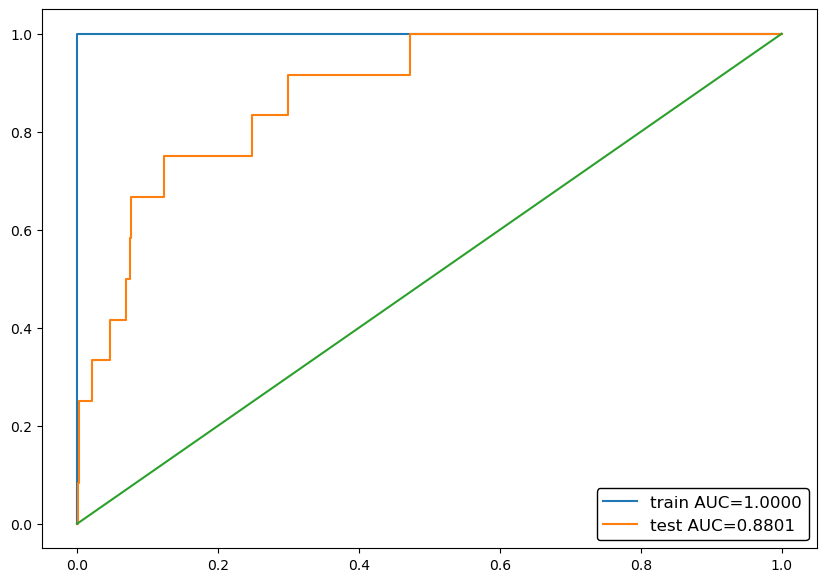

In [204]:
train_auc = roc_auc_score(y_train, y_train_predicted)
test_auc = roc_auc_score(y_test, y_test_predicted)

plt.figure(figsize=(10,7))
plt.plot(*roc_curve(y_train, y_train_predicted)[:2], label='train AUC={:.4f}'.format(train_auc))
plt.plot(*roc_curve(y_test, y_test_predicted)[:2], label='test AUC={:.4f}'.format(test_auc))
legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
plt.show()

In [205]:
y_test_predict = boosting_model.predict(X_test)
y_train_predict = boosting_model.predict(X_train)


In [206]:
print('train')
print ( 'Accuracy:', accuracy_score(y_train, y_train_predict))
print ('F1 score:', f1_score(y_train, y_train_predict))
print ('Recall:', recall_score(y_train, y_train_predict))
print ('Precision:', precision_score(y_train, y_train_predict))
print('test')
print ( 'Accuracy:', accuracy_score(y_test, y_test_predict))
print ('F1 score:', f1_score(y_test, y_test_predict))
print ('Recall:', recall_score(y_test, y_test_predict))
print ('Precision:', precision_score(y_test, y_test_predict))

train
Accuracy: 0.9990828492815653
F1 score: 0.961038961038961
Recall: 0.925
Precision: 1.0
test
Accuracy: 0.9853300733496333
F1 score: 0.0
Recall: 0.0
Precision: 0.0


c:\Users\Katie\miniconda3\envs\mltest\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
